# 先import會用到的套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

# 設定colab畫圖會用到的中文字型

In [7]:
import matplotlib
print(matplotlib.__file__)

/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py


In [8]:
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

--2021-05-31 18:01:18--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.101.128, 2607:f8b0:4023:c06::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  63.7MB/s    in 1.8s    

2021-05-31 18:01:20 (63.7 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflatin

In [10]:
import matplotlib.font_manager as font_manager
font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"
sns.set(font="Noto Sans Mono CJK TC")

# 資料處理

In [3]:
data = pd.read_excel("/content/drive/MyDrive/碩一下/Machine Learning/小組作業/2020Q4   電子業  資產負債表  IFRS以合併為主簡表(累計 ).xlsx",sheet_name="05.30",index_col="代號")
data.head(3)

,名稱,年/月,營業毛利率,研究發展費用率,負債比率,淨營業週期（日）,平均售貨天數,平均收帳天數,總資產週轉次數,固定資產週轉次數,存貨週轉率（次）,速動比率,應收帳款週轉次數,營業費用率,流動比率,總資產週轉率,應收帳款週轉率,應付帳款週轉率
代號,,,,,,,,,,,,,,,,,,
1435,中福,2019-12-01,94.03,0.00,15.73,1643.97,1638.75,21.34,0.02,0.23,0.22,11701.98,17.10,173.99,11882.10,1.974891,1.314178,2.604578
1471,首利,2019-12-01,-6.32,1.79,48.75,89.70,28.37,122.24,0.63,2.04,12.86,77.58,2.99,27.69,97.48,73.481958,22.356747,13.403432
1537,廣隆,2019-12-01,23.38,0.51,25.40,130.39,98.06,54.95,1.41,7.54,3.72,273.01,6.64,6.83,422.62,145.792741,14.248066,4.309813


In [4]:
data.describe()

,營業毛利率,研究發展費用率,負債比率,淨營業週期（日）,平均售貨天數,平均收帳天數,總資產週轉次數,固定資產週轉次數,存貨週轉率（次）,速動比率,應收帳款週轉次數,營業費用率,流動比率,總資產週轉率,應收帳款週轉率,應付帳款週轉率
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,20.361122,5.917268,42.745780,104.012878,87.168000,83.944268,0.918317,22.579195,26.752366,216.209756,7.655244,23.020488,276.367561,89.979515,22.633673,17.667453
std,19.252430,9.434883,17.430827,100.477304,96.141867,39.893781,0.648422,117.085024,290.741956,593.342829,27.981612,65.394091,604.604868,60.769314,10.504147,8.246752
min,-110.640000,0.000000,1.070000,-44.900000,0.000000,0.000000,0.010000,0.110000,0.000000,15.520000,0.000000,1.220000,40.030000,0.535932,0.000000,0.000000
25%,11.402500,1.575000,30.700000,56.560000,44.967500,57.465000,0.562500,1.982500,3.330000,98.957500,3.325000,9.552500,142.877500,55.036582,15.745272,11.976740
50%,19.625000,3.625000,42.830000,90.715000,72.710000,78.120000,0.760000,3.995000,4.935000,139.850000,4.670000,14.910000,194.800000,76.366855,20.858774,17.122067
75%,28.580000,6.740000,55.185000,130.907500,108.955000,109.070000,1.070000,9.410000,7.967500,216.342500,6.337500,21.582500,288.677500,104.961312,28.581758,22.712080
max,99.830000,142.010000,94.880000,1643.970000,1638.750000,299.900000,5.340000,1802.550000,5384.960000,11701.980000,530.260000,1205.920000,11882.100000,510.367720,82.423693,52.973094


In [5]:
# 把Ｙ分組
from sklearn.cluster import KMeans
#print(data["conam"].describe())
km = KMeans(n_clusters=3)
a = data['營業毛利率'].values.reshape(-1,1)
conam_g = km.fit_predict(a)
#把分好組的Ｙ加入原來的表格
data["營業毛利率_g"] = conam_g
data[["營業毛利率","營業毛利率_g"]].head(3)

,營業毛利率,營業毛利率_g
代號,,
1435,94.03,2
1471,-6.32,0
1537,23.38,0


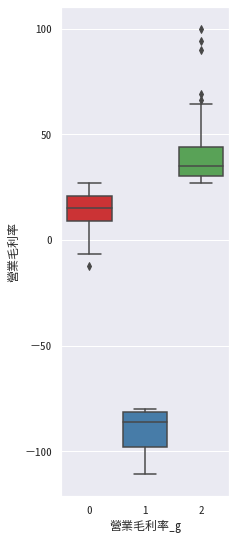

In [11]:
# 把分好組的Y每組分佈畫出來看看
plt.figure(figsize=(3,9))
sns.boxplot(x=data["營業毛利率_g"],y=data["營業毛利率"], palette="Set1")
#plt.savefig("figs/conam_g_5.png",dpi=300) #存檔

In [ ]:
# 看一下分組後的Y
E = data[["營業毛利率","營業毛利率_g"]]
E.groupby("營業毛利率_g").describe().T

營業毛利率_g               0           1           2
營業毛利率 count  288.000000  119.000000    5.000000
      mean    14.458819   39.168235  -91.210000
      std      7.808814   12.775372   12.940029
      min    -12.110000   26.980000 -110.640000
      25%      8.855000   30.405000  -97.880000
      50%     15.320000   35.240000  -86.150000
      75%     20.907500   44.020000  -81.330000
      max     26.810000   99.830000  -80.050000

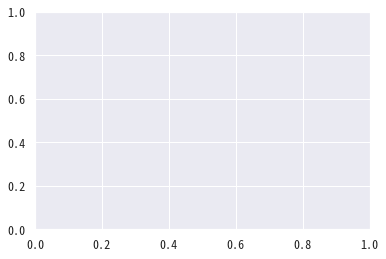

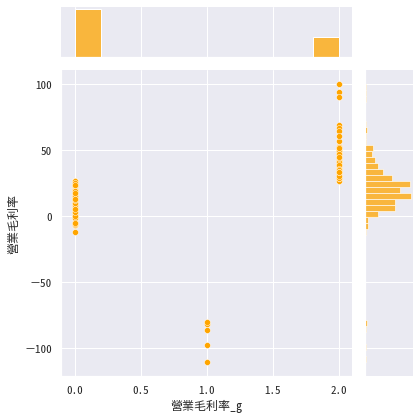

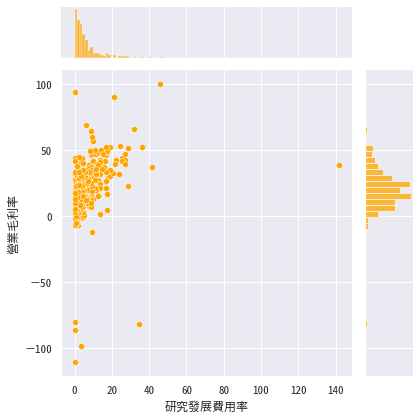

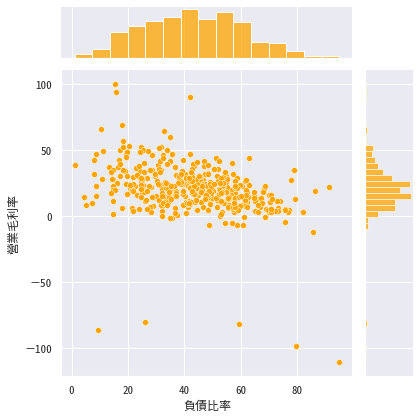

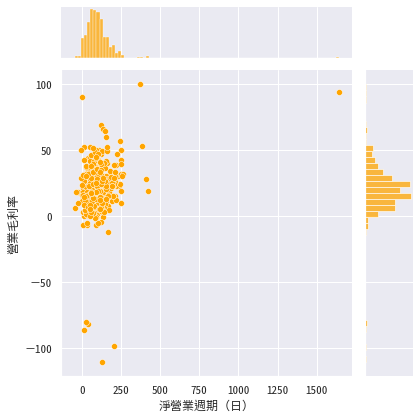

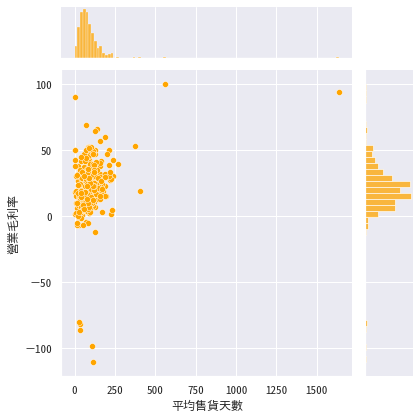

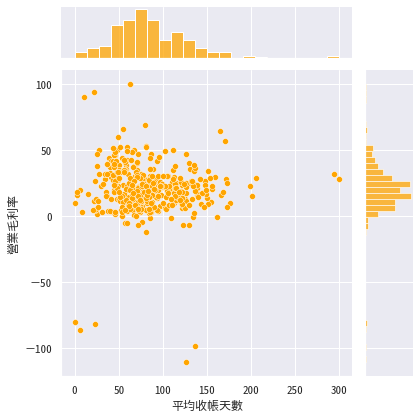

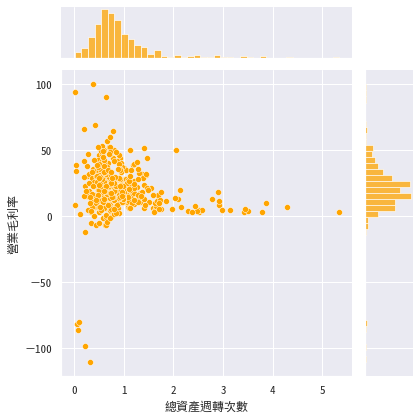

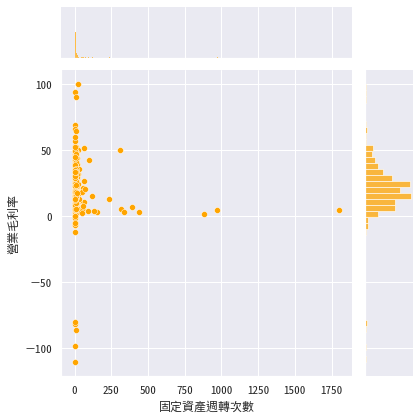

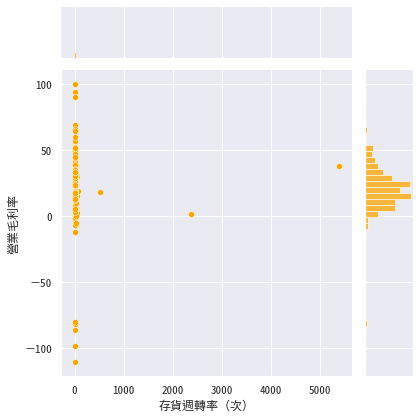

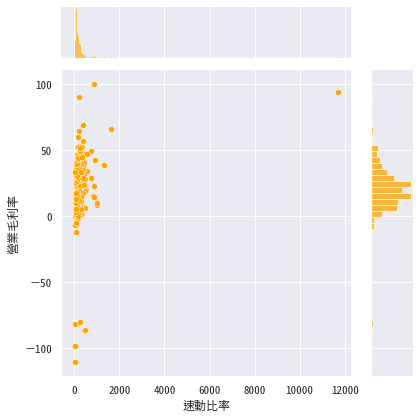

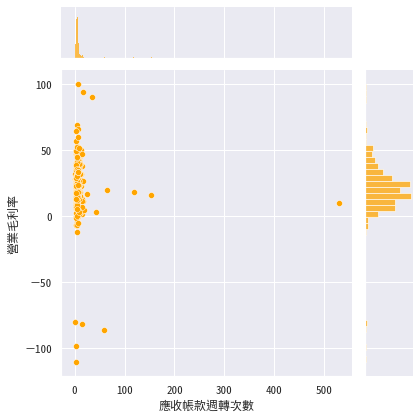

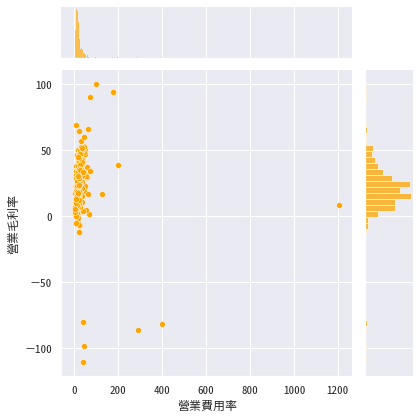

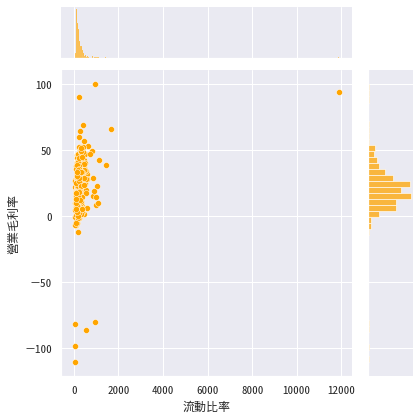

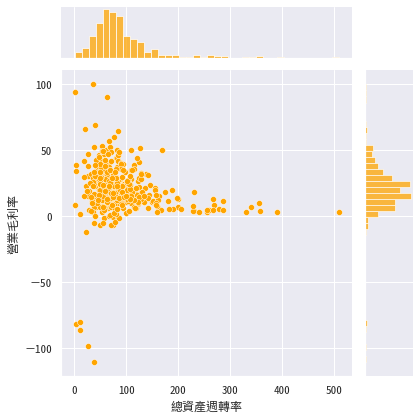

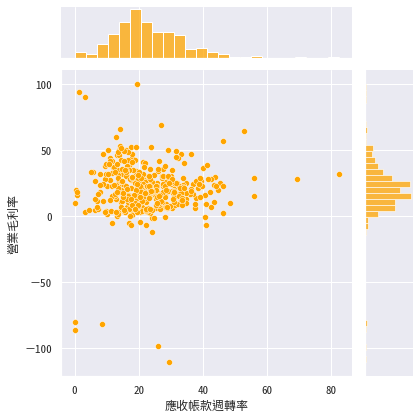

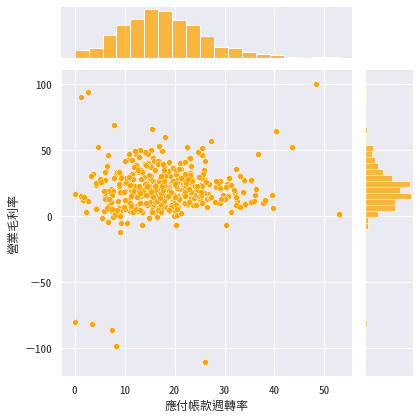

In [13]:
# 畫各個Ｘ和Ｙ的關係圖 
sns.set(font="Noto Sans Mono CJK TC")
#plt.xticks(fontproperties=myfont)

draw_list=['營業毛利率_g', '研究發展費用率',  '負債比率', '淨營業週期（日）',
       '平均售貨天數', '平均收帳天數', '總資產週轉次數', '固定資產週轉次數', '存貨週轉率（次）', '速動比率',
       '應收帳款週轉次數', '營業費用率', '流動比率', '總資產週轉率', '應收帳款週轉率', '應付帳款週轉率']


for i in draw_list:
  plt.tick_params(labelsize=12)
  sns.jointplot(y = data["營業毛利率"], x = data[i], data=data,color="orange")
  plt.tight_layout()
  plt.xticks(rotation=45,ha="right") 
  #plt.savefig(f'/content/drive/MyDrive/碩一下/Machine Learning/小組作業/figs_1/{i}.jpg',dpi=300)

# PCA 
### 這邊因為都是舊資料，但是現在python讀取的是新資料，執行的話會出錯，要練習的話記得把變項改成新資料裡面的喔！

In [14]:
# 把所有變項標準化
draw_list=['營業毛利率', '營業毛利率_g','研究發展費用率',  '負債比率', '淨營業週期（日）',
       '平均售貨天數', '平均收帳天數', '總資產週轉次數', '固定資產週轉次數', '存貨週轉率（次）', '速動比率',
       '應收帳款週轉次數', '營業費用率', '流動比率', '總資產週轉率', '應收帳款週轉率', '應付帳款週轉率']


from sklearn.preprocessing import StandardScaler
scale = StandardScaler() #z-scaler物件
data_scaled = pd.DataFrame(scale.fit_transform(data[draw_list]),
                           columns=draw_list)
data_scaled.head(3)

,營業毛利率,營業毛利率_g,研究發展費用率,負債比率,淨營業週期（日）,平均售貨天數,平均收帳天數,總資產週轉次數,固定資產週轉次數,存貨週轉率（次）,速動比率,應收帳款週轉次數,營業費用率,流動比率,總資產週轉率,應收帳款週轉率,應付帳款週轉率
0,3.831147,1.552327,-0.627935,-1.551779,15.345143,16.158181,-1.571191,-1.387081,-0.191113,-0.091369,19.381380,0.337947,2.311431,19.219018,-1.449945,-2.032106,-1.828754
1,-1.387551,-0.653753,-0.437982,0.344881,-0.142623,-0.612323,0.961115,-0.445187,-0.175636,-0.047841,-0.233927,-0.166929,0.071493,-0.296237,-0.271810,-0.026396,-0.517686
2,0.156997,-0.653753,-0.573815,-0.996337,0.262839,0.113429,-0.727675,0.759202,-0.128604,-0.079316,0.095846,-0.036327,-0.247886,0.242193,0.919566,-0.799289,-1.621724


In [ ]:
# PCA
# 這邊用的資料是舊資料，直接跑的話會出錯，你自己換變項跑跑看
from sklearn.decomposition import PCA
import numpy as np

pca=PCA(n_components = 2)
pca.fit(data_scaled[['稅後淨利率_g',"研究發展費用率"]])
new = pca.transform(data_scaled[["稅後淨利率_g","研究發展費用率"]])
print("original shape: ", data_scaled[["稅後淨利率_g","研究發展費用率"]].shape)
print("transformed shape:", data_scaled[["稅後淨利率_g","研究發展費用率"]].shape)

(-17.036331299134694,
 15.460418074517294,
 -4.458049205776192,
 16.512408972051787)

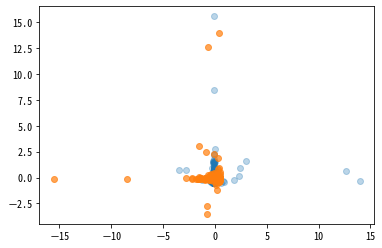

In [ ]:
# 畫PCA轉換前後的分佈圖
new = pca.inverse_transform(new)
plt.scatter(data_scaled["稅後淨利成長率"],data_scaled["研究發展費用率"], alpha=0.3)
plt.scatter(new[:,0], new[:,1], alpha=0.7)
plt.axis('equal')

In [ ]:
pca=PCA(n_components = 2)
pca.fit(data_scaled[["研究發展費用率","營業毛利率"]])
new = pca.transform(data_scaled[["研究發展費用率","營業毛利率"]])
print("original shape: ", data_scaled[["研究發展費用率","營業毛利率"]].shape)
print("transformed shape:", data_scaled[["研究發展費用率","營業毛利率"]].shape)

original shape:  (408, 2)
transformed shape: (408, 2)


(-7.811655259871029,
 16.672104498437257,
 -19.720714157238465,
 3.244815008821816)

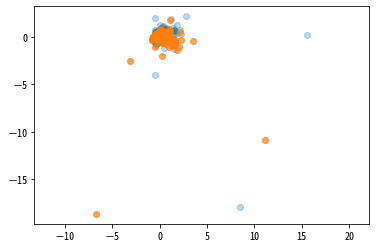

In [ ]:
new = pca.inverse_transform(new)
plt.scatter(data_scaled["研究發展費用率"],data_scaled["營業毛利率"], alpha=0.3)
plt.scatter(new[:,0], new[:,1], alpha=0.7)
plt.axis('equal')

In [ ]:
pca=PCA(n_components = 2)
pca.fit(data_scaled[["稅後淨利成長率","營業毛利率"]])
new = pca.transform(data_scaled[["稅後淨利成長率","營業毛利率"]])
print("original shape: ", data_scaled[["稅後淨利成長率","營業毛利率"]].shape)
print("transformed shape:", data_scaled[["稅後淨利成長率","營業毛利率"]].shape)

original shape:  (408, 2)
transformed shape: (408, 2)


(-13.933673556484504,
 15.312672467724429,
 -19.478974038398608,
 14.307016193904238)

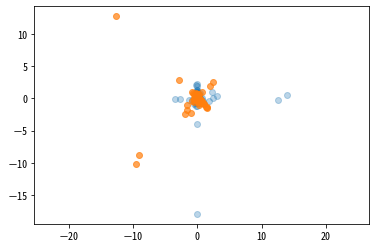

In [ ]:
new = pca.inverse_transform(new)
plt.scatter(data_scaled["稅後淨利成長率"],data_scaled["營業毛利率"], alpha=0.3)
plt.scatter(new[:,0], new[:,1], alpha=0.7)
plt.axis('equal')

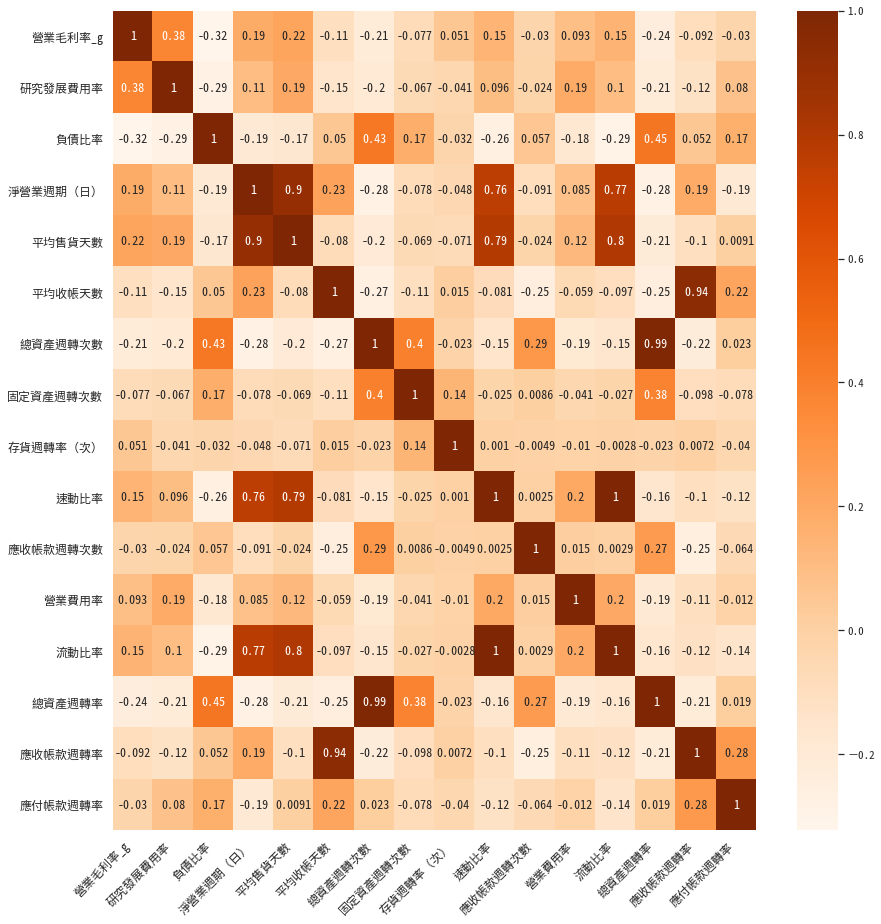

In [15]:
# 看看各變項間和Y的相關圖

draw_list=[ '營業毛利率_g', '研究發展費用率', '負債比率', '淨營業週期（日）',
       '平均售貨天數', '平均收帳天數', '總資產週轉次數', '固定資產週轉次數', '存貨週轉率（次）', '速動比率',
       '應收帳款週轉次數', '營業費用率', '流動比率', '總資產週轉率', '應收帳款週轉率', '應付帳款週轉率']


plt.figure(figsize=(13,13))
plt.tick_params(labelsize=12)
#產生相關矩陣
corr = data[draw_list].corr()
#用剛剛產生的相關矩陣話熱點圖
sns.heatmap(corr,cmap="Oranges",annot=True,annot_kws={"size":12})
#設定Ｘ軸字的角度
plt.xticks(rotation=45,ha="right") 
plt.tight_layout()
#plt.savefig(f'/content/drive/MyDrive/碩一下/Machine Learning/小組作業/figs_1/corr.jpg',dpi=300)

# 模型
## 因為訓練集和測試集是隨機切分的，所以每次訓練出來的模型準確度會有差異喔！多跑幾次選一個正確度高的來用～

In [ ]:
# 隨機森林

draw_list=[ '研究發展費用率', '負債比率', '淨營業週期（日）',
       '平均售貨天數', '平均收帳天數', '總資產週轉次數', '固定資產週轉次數', '存貨週轉率（次）', '速動比率',
       '應收帳款週轉次數', '營業費用率', '流動比率', '總資產週轉率', '應收帳款週轉率', '應付帳款週轉率']

# 建立訓練與測試資料
Y = data["營業毛利率_g"]
X = data[draw_list]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#切分訓練及測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
#設定模型架構
rfc = RandomForestClassifier(n_estimators = 10, random_state = 13,max_depth=5)
#訓練模型
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
#預測
predicted = rfc.predict(X_test)
#計算測試集資料準確度
accuracy = metrics.accuracy_score(Y_test, predicted)
print(accuracy)

0.8306451612903226


In [ ]:
#做交叉驗證，如果模型準確度和交叉驗證相差很大，就要考慮是不是有過擬合的問題
from sklearn.model_selection import cross_val_score

scores_cv = cross_val_score(rfc,X,Y,cv=10)#cv 是要把資料分成幾分，通常大的資料會分10份以上，我們的資料沒有很大分10份就好

print(scores_cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_cv.mean(), scores_cv.std() * 2))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.71428571 0.78571429 0.82926829 0.87804878 0.85365854 0.73170732
 0.85365854 0.82926829 0.70731707 0.80487805]
Accuracy: 0.80 (+/- 0.12)


In [ ]:
#畫樹的圖（隨機森林會產生很多棵樹，這邊先隨便選一顆）
#選擇一棵樹（我隨便亂選的）
estimator_limited = rfc.estimators_[3]

from sklearn.tree import export_graphviz
import graphviz

tree = graphviz.Source(export_graphviz(estimator_limited, #out_file='tree_limited.dot', 
                                feature_names = X_train.columns,
                                class_names = ["0","1","2"],
                                rounded = True, proportion = False, precision = 2, filled = True))
tree

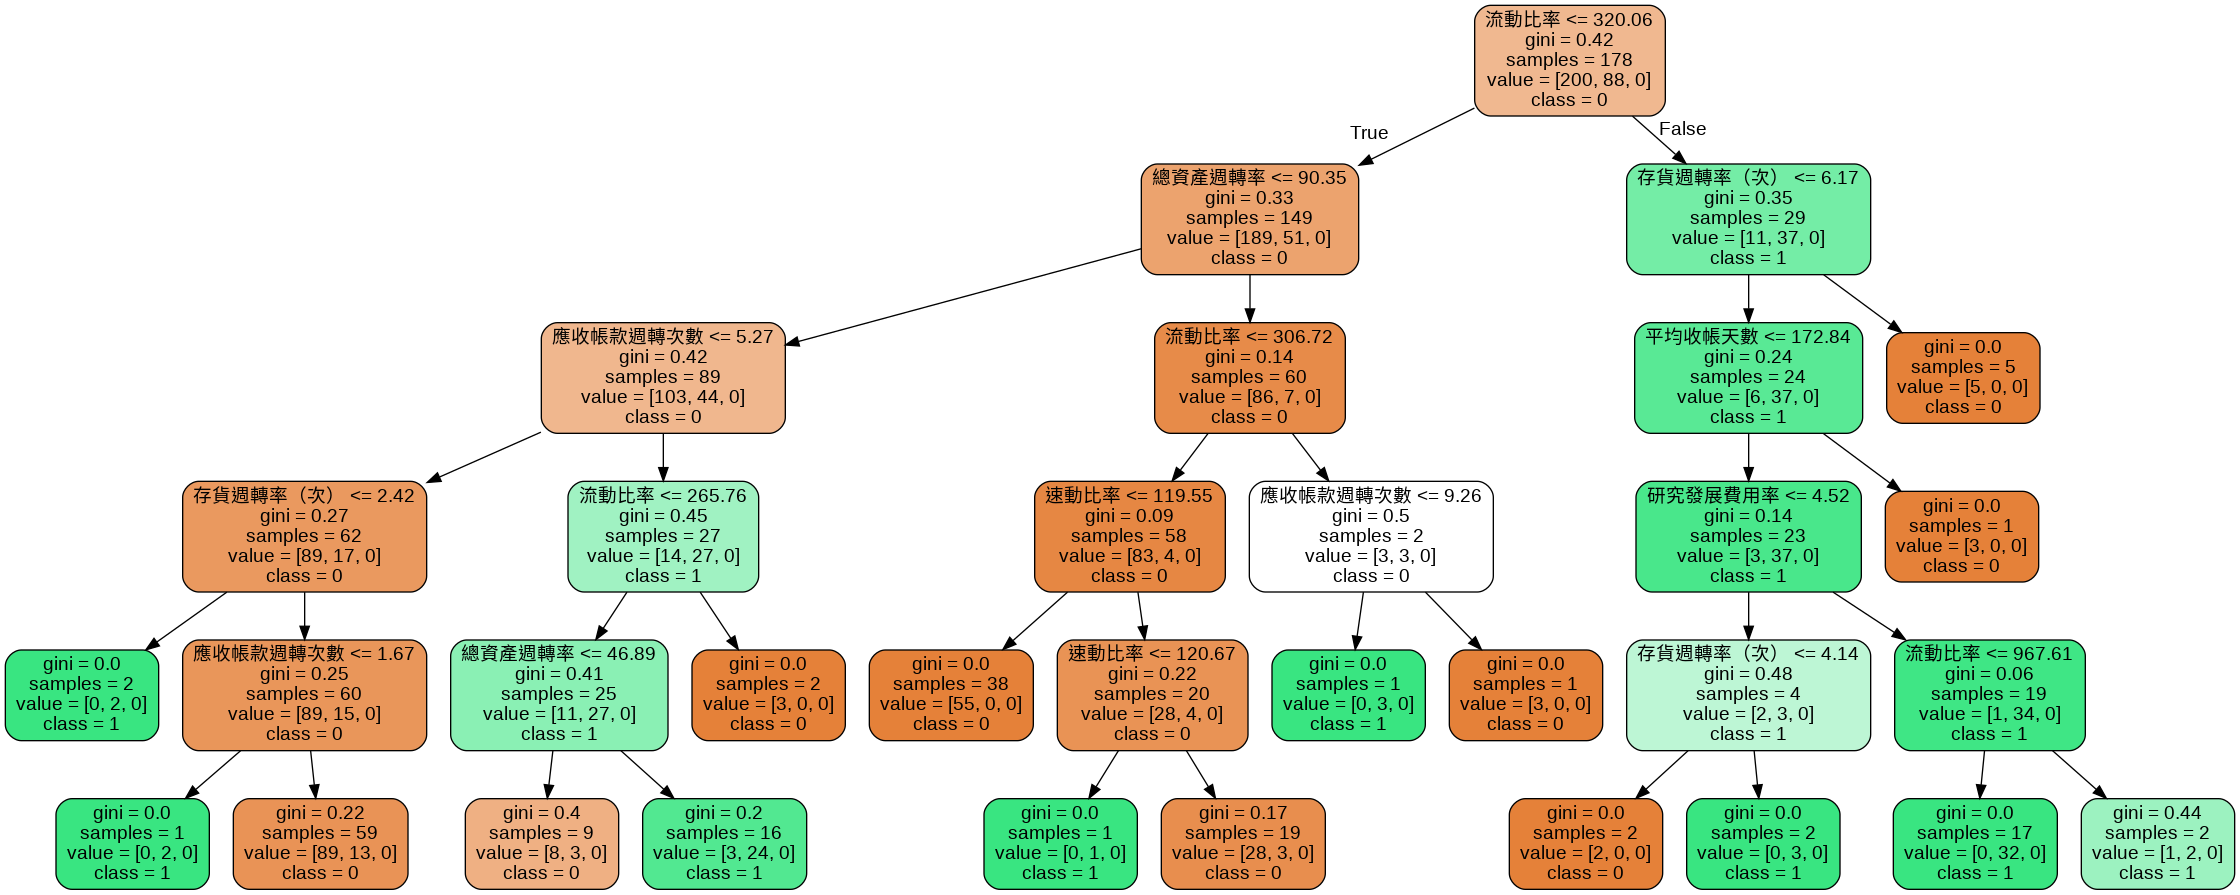

In [ ]:
import pydotplus
from IPython.display import Image

tree = export_graphviz(estimator_limited, #out_file='tree_limited.dot', 
                                feature_names = X_train.columns,
                                class_names = ["0","1","2"],
                                rounded = True, proportion = False, precision = 2, filled = True)


graph = pydotplus.graph_from_dot_data(tree)
Image(graph.create_png())

In [ ]:
# 特徵重要性
rfc.feature_importances_

array([0.03586625, 0.03358945, 0.02690687, 0.07763833, 0.01853706,
       0.05302693, 0.03738517, 0.09622997, 0.09823011, 0.05282251,
       0.20233341, 0.11144422, 0.09935685, 0.02330939, 0.03332347])

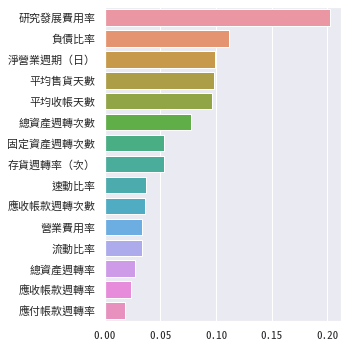

In [ ]:
# 把特徵重要性畫成圖
plt.figure(figsize=(5,5))
#先把特徵重要性案數值大小排序
im = sorted(rfc.feature_importances_,reverse=True)
#畫圖
sns.barplot(y = X.columns, x = im)
plt.tight_layout()
#plt.savefig("figs/f_IM.png",dpi=300)

# Co occurance metrix

In [16]:
# 先來做一個Ａ，把不要的欄位都丟掉
A = data.drop(columns=["名稱","年/月","營業毛利率_g"])
#p 是個欄位的描述性統計，我們要用Q1, Q2, Q3把這些資料切成四份(編號是1,2,3,4)，所以先把這些數值找出來
p = A.describe()
p = p.iloc[4:7]
p

,營業毛利率,研究發展費用率,負債比率,淨營業週期（日）,平均售貨天數,平均收帳天數,總資產週轉次數,固定資產週轉次數,存貨週轉率（次）,速動比率,應收帳款週轉次數,營業費用率,流動比率,總資產週轉率,應收帳款週轉率,應付帳款週轉率
25%,11.4025,1.575,30.700,56.5600,44.9675,57.465,0.5625,1.9825,3.3300,98.9575,3.3250,9.5525,142.8775,55.036582,15.745272,11.976740
50%,19.6250,3.625,42.830,90.7150,72.7100,78.120,0.7600,3.9950,4.9350,139.8500,4.6700,14.9100,194.8000,76.366855,20.858774,17.122067
75%,28.5800,6.740,55.185,130.9075,108.9550,109.070,1.0700,9.4100,7.9675,216.3425,6.3375,21.5825,288.6775,104.961312,28.581758,22.712080


In [18]:
#做一個空的DataFrame，等一下要裝切完的數據
B = pd.DataFrame(index=A.index,columns = A.columns)
B.head(3)

,營業毛利率,研究發展費用率,負債比率,淨營業週期（日）,平均售貨天數,平均收帳天數,總資產週轉次數,固定資產週轉次數,存貨週轉率（次）,速動比率,應收帳款週轉次數,營業費用率,流動比率,總資產週轉率,應收帳款週轉率,應付帳款週轉率
代號,,,,,,,,,,,,,,,,
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#切分數據
for col in A.columns: #輪流找出A的每一個欄位
  for i in (A[col].index): #判斷欄位中每個值應該是1,2,3,4的哪一份
    if A[col][i] <= p[col][0]: #如果小於Q1就是1
      B[col][i] = 1
    elif ( A[col][i]> p[col][0]) & (A[col][i] <= p[col][1]): #介於Q1-Q2間的是2
      B[col][i] = 2
    elif (A[col][i] > p[col][1]) & (A[col][i] <= p[col][2]): #介於Q2-Q3間的是3
      B[col][i] = 3
    elif A[col][i] > p[col][2]: #大於Q3間的是4
      B[col][i] = 4
    else:
      B[col][i] = 0

In [20]:
#資料填進去B之後會長這樣
B

,營業毛利率,研究發展費用率,負債比率,淨營業週期（日）,平均售貨天數,平均收帳天數,總資產週轉次數,固定資產週轉次數,存貨週轉率（次）,速動比率,應收帳款週轉次數,營業費用率,流動比率,總資產週轉率,應收帳款週轉率,應付帳款週轉率
代號,,,,,,,,,,,,,,,,
1435,4,1,1,4,4,1,1,1,1,4,4,4,4,1,1,1
1471,1,2,3,2,1,4,2,2,4,1,1,4,1,2,3,2
1537,3,1,1,3,3,1,4,3,2,4,4,1,4,4,1,1
1582,3,2,3,2,1,4,3,4,4,3,1,2,3,3,4,4
2301,2,2,4,1,2,3,3,3,3,2,2,2,1,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911868,4,1,2,3,4,1,1,4,1,4,4,4,4,1,1,1
912000,2,3,1,3,4,2,1,3,1,4,3,4,4,1,1,1
9136,2,1,3,4,3,4,2,1,2,1,1,1,1,2,2,1


In [21]:
# 把B改成每個指標出現在哪一個欄位
C = pd.get_dummies(B)
C

,營業毛利率_1,營業毛利率_2,營業毛利率_3,營業毛利率_4,研究發展費用率_1,研究發展費用率_2,研究發展費用率_3,研究發展費用率_4,負債比率_1,負債比率_2,負債比率_3,負債比率_4,淨營業週期（日）_1,淨營業週期（日）_2,淨營業週期（日）_3,淨營業週期（日）_4,平均售貨天數_1,平均售貨天數_2,平均售貨天數_3,平均售貨天數_4,平均收帳天數_1,平均收帳天數_2,平均收帳天數_3,平均收帳天數_4,總資產週轉次數_1,總資產週轉次數_2,總資產週轉次數_3,總資產週轉次數_4,固定資產週轉次數_1,固定資產週轉次數_2,固定資產週轉次數_3,固定資產週轉次數_4,存貨週轉率（次）_1,存貨週轉率（次）_2,存貨週轉率（次）_3,存貨週轉率（次）_4,速動比率_1,速動比率_2,速動比率_3,速動比率_4,應收帳款週轉次數_1,應收帳款週轉次數_2,應收帳款週轉次數_3,應收帳款週轉次數_4,營業費用率_1,營業費用率_2,營業費用率_3,營業費用率_4,流動比率_1,流動比率_2,流動比率_3,流動比率_4,總資產週轉率_1,總資產週轉率_2,總資產週轉率_3,總資產週轉率_4,應收帳款週轉率_1,應收帳款週轉率_2,應收帳款週轉率_3,應收帳款週轉率_4,應付帳款週轉率_1,應付帳款週轉率_2,應付帳款週轉率_3,應付帳款週轉率_4
代號,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1435,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1471,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1537,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
1582,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2301,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911868,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
912000,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
9136,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [22]:
# 做出共現性矩陣
co_metrix = C.T.dot(C)
co_metrix

,營業毛利率_1,營業毛利率_2,營業毛利率_3,營業毛利率_4,研究發展費用率_1,研究發展費用率_2,研究發展費用率_3,研究發展費用率_4,負債比率_1,負債比率_2,負債比率_3,負債比率_4,淨營業週期（日）_1,淨營業週期（日）_2,淨營業週期（日）_3,淨營業週期（日）_4,平均售貨天數_1,平均售貨天數_2,平均售貨天數_3,平均售貨天數_4,平均收帳天數_1,平均收帳天數_2,平均收帳天數_3,平均收帳天數_4,總資產週轉次數_1,總資產週轉次數_2,總資產週轉次數_3,總資產週轉次數_4,固定資產週轉次數_1,固定資產週轉次數_2,固定資產週轉次數_3,固定資產週轉次數_4,存貨週轉率（次）_1,存貨週轉率（次）_2,存貨週轉率（次）_3,存貨週轉率（次）_4,速動比率_1,速動比率_2,速動比率_3,速動比率_4,應收帳款週轉次數_1,應收帳款週轉次數_2,應收帳款週轉次數_3,應收帳款週轉次數_4,營業費用率_1,營業費用率_2,營業費用率_3,營業費用率_4,流動比率_1,流動比率_2,流動比率_3,流動比率_4,總資產週轉率_1,總資產週轉率_2,總資產週轉率_3,總資產週轉率_4,應收帳款週轉率_1,應收帳款週轉率_2,應收帳款週轉率_3,應收帳款週轉率_4,應付帳款週轉率_1,應付帳款週轉率_2,應付帳款週轉率_3,應付帳款週轉率_4
營業毛利率_1,103,0,0,0,53,26,16,8,14,23,16,50,42,22,25,14,45,32,16,10,26,30,22,25,26,23,12,42,32,17,18,36,9,16,32,46,47,26,16,14,25,23,30,25,58,19,12,14,46,29,14,14,23,20,17,43,26,26,30,21,36,25,25,17
營業毛利率_2,0,102,0,0,22,28,40,12,17,22,31,32,28,30,25,19,28,30,23,21,18,28,29,27,17,26,33,26,27,24,24,27,20,24,29,29,29,30,29,14,27,29,28,18,28,40,26,8,34,22,32,14,18,25,27,32,19,32,25,26,23,18,26,35
營業毛利率_3,0,0,103,0,17,33,31,22,25,27,34,17,12,29,27,35,14,26,33,30,16,18,34,35,25,27,33,18,19,32,32,20,30,33,26,14,17,29,28,29,35,34,18,16,11,37,39,16,14,29,29,31,23,30,37,13,18,18,29,38,20,24,29,30
營業毛利率_4,0,0,0,102,11,15,15,61,47,31,20,4,21,21,25,35,16,14,30,42,43,26,17,16,35,31,21,15,25,29,28,20,45,28,15,14,10,17,29,46,16,17,25,44,6,7,24,65,9,22,27,44,39,27,21,15,40,26,18,18,24,35,22,21
研究發展費用率_1,53,22,17,11,103,0,0,0,21,15,23,44,38,24,23,18,45,28,15,15,33,26,21,23,25,21,18,39,24,22,22,35,14,15,27,47,41,28,13,21,23,22,26,32,57,20,12,14,37,31,13,22,22,21,23,37,34,23,24,22,46,30,16,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
應收帳款週轉率_4,21,26,38,18,22,38,22,21,18,32,31,22,6,23,28,46,24,32,23,24,0,0,16,87,26,40,24,13,31,36,24,12,23,24,31,25,21,27,33,22,87,16,0,0,21,33,32,17,20,32,29,22,26,36,31,10,0,0,0,103,15,20,28,40
應付帳款週轉率_1,36,23,20,24,46,22,14,21,33,24,22,24,22,20,24,37,41,17,20,25,35,29,22,17,46,25,16,16,45,20,17,21,25,20,17,41,27,16,24,36,18,22,29,34,33,24,23,23,25,20,20,38,43,25,18,17,38,25,25,15,103,0,0,0
應付帳款週轉率_2,25,18,24,35,30,22,21,29,34,26,21,21,15,26,33,28,20,20,33,29,35,22,24,21,24,31,24,23,25,28,23,26,30,32,21,19,20,25,27,30,20,25,22,35,23,19,27,33,21,21,32,28,26,24,27,25,36,23,23,20,0,102,0,0
應付帳款週轉率_3,25,26,29,22,16,28,31,27,25,28,28,21,30,25,23,24,22,33,23,24,23,24,26,29,22,27,24,29,22,28,28,24,24,23,32,23,28,25,23,26,29,26,24,23,27,27,26,22,25,28,22,27,21,29,23,29,20,24,30,28,0,0,102,0


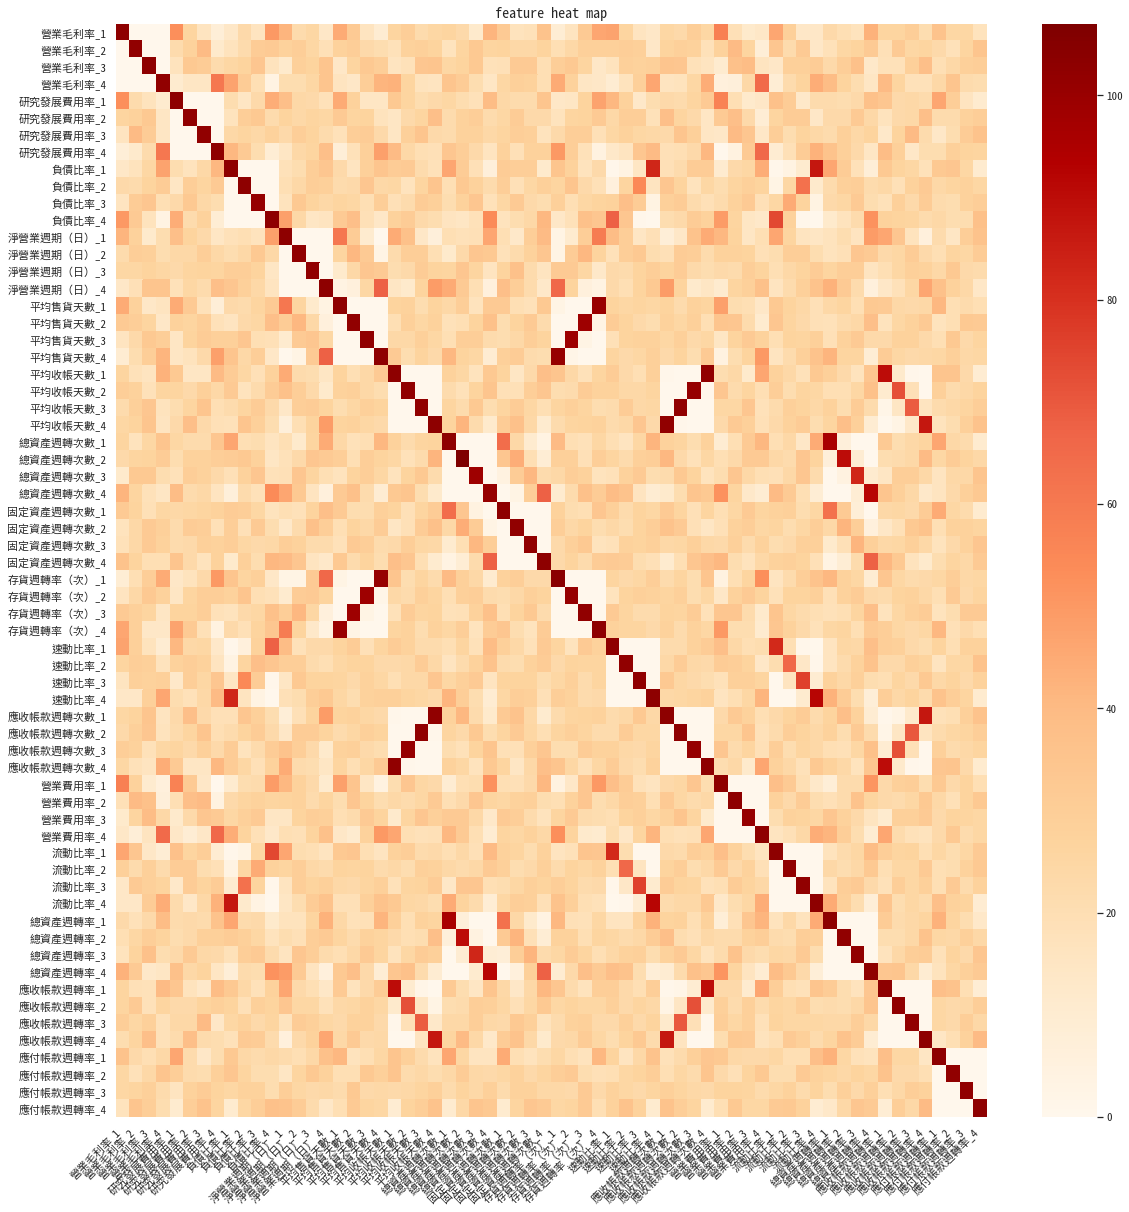

In [23]:
# 畫共現性矩陣的熱點圖
plt.figure(figsize=(17,17))

sns.heatmap(co_metrix, cmap='OrRd')

plt.title('feature heat map', size = 14)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/碩一下/Machine Learning/小組作業/figs_1/occ.jpg',dpi=300)

In [30]:
# 等一下畫network要用的參數
# w 要長這樣[節點1,節點2,共現次數]
w=[]
for x in co_metrix.columns:
  for y in co_metrix.columns:
    c=[x,y,co_metrix[x][y]]
    w.append(c)
# 把w中前四象印出來看看
w[0:4]

[['營業毛利率_1', '營業毛利率_1', 103],
 ['營業毛利率_1', '營業毛利率_2', 0],
 ['營業毛利率_1', '營業毛利率_3', 0],
 ['營業毛利率_1', '營業毛利率_4', 0]]

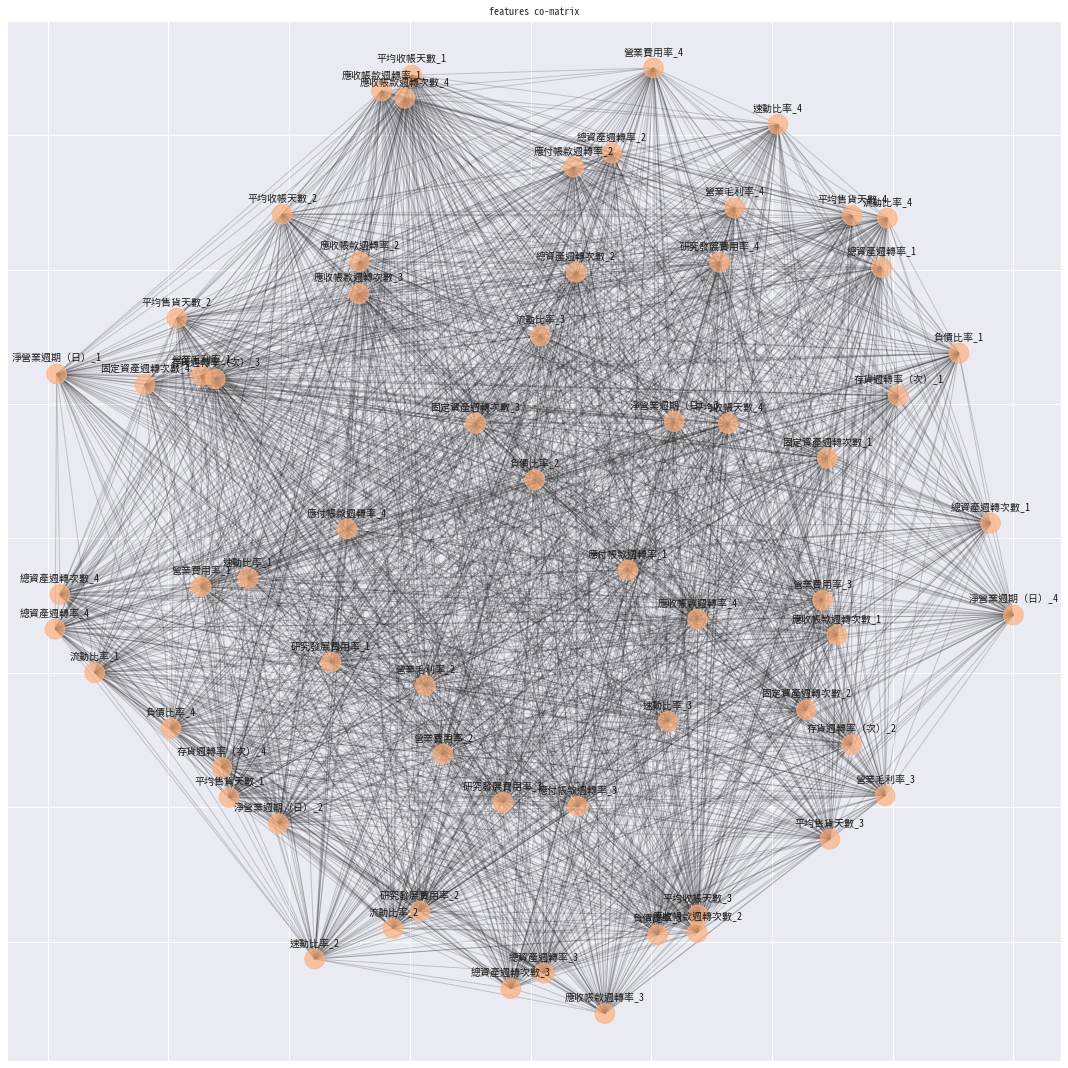

In [29]:
# 畫network圖
import networkx as nx
plt.figure(figsize=(15,15))
#先做一張空白的圖
g = nx.Graph()
#把節點和邊加入
g.add_weighted_edges_from(w)
#建立佈局（美化用的）
pos=nx.spring_layout(g)
#設定點和邊的顏色、透明度
nx.draw_networkx_nodes(g, pos, alpha=0.7,node_size=[val*6 for (node, val) in g.degree()], node_color='#ffb07c')
nx.draw_networkx_edges(g, pos, alpha=0.2)
#設定字的位置
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
#把節點名稱(就是分組之後的變項們）寫到圖上
nx.draw_networkx_labels(g, pos, font_size = 10, font_family="Noto Sans Mono CJK TC")
plt.title('features co-matrix', size = 10)
plt.tight_layout()
#plt.savefig("/content/drive/MyDrive/碩一下/Machine Learning/小組作業/figs_1/feature_network.jpg", dpi=300)#
#plt.show()